## Week 4 Capstone Work

For Week 4, include concepts such as logistic regression and feature scaling.

In [2]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from matplotlib.colors import ListedColormap

In [3]:
# Read in wr data and convert injury to binary
wr = pd.read_csv('data/cleaned/wr_eng.csv', sep=',', header=0)

wr['Injured'] = (wr['Injury_Duration'] > 0).astype(float)

wr = wr.drop(columns=['Injury_Duration'])
wr.head()

,Length,Distance,DirChanges,Max_S,Max_A,Temperature,Precipitation,FieldType_Natural,PlayType_Extra Point,PlayType_Field Goal,...,PlayType_Punt Not Returned,PlayType_Punt Returned,PlayType_Rush,Length_sq,Distance_sq,DirChanges_sq,Max_S_sq,Max_A_sq,Temperature_sq,Injured
0,35.3,52.89,35.0,7.59,0.62,39.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1246.09,2797.3521,1225.0,57.6081,0.3844,1521.0,1.0
1,43.9,61.42,13.0,7.34,1.06,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1927.21,3772.4164,169.0,53.8756,1.1236,4900.0,1.0
2,29.4,38.52,14.0,7.37,0.89,44.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,864.36,1483.7904,196.0,54.3169,0.7921,1936.0,1.0
3,18.9,47.06,2.0,7.75,0.36,76.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,357.21,2214.6436,4.0,60.0625,0.1296,5776.0,1.0
4,18.7,73.23,0.0,9.48,0.41,48.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,349.69,5362.6329,0.0,89.8704,0.1681,2304.0,1.0


In [4]:
X_wr = wr.drop(columns=['Injured']).copy()
y_wr = wr['Injured'].copy()

scaler = StandardScaler()
X_wr_scaled = scaler.fit_transform(X_wr)

In [5]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
logreg = LogisticRegression()

scores_wr = cross_val_score(estimator=logreg, X=X_wr_scaled, y=y_wr, scoring='neg_mean_squared_error', cv=rkf)

In [6]:
np.sqrt(-scores_wr.mean()), y_wr.std()

(np.float64(0.19806203934265504), np.float64(0.21296899662224444))

In [7]:
rkf1 = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)
y_wr_pred = cross_val_predict(estimator=LogisticRegression(), X=X_wr_scaled, y=y_wr, cv=rkf1)

print('Accuracy: ', (y_wr_pred == y_wr).mean())

conf_matrix = confusion_matrix(y_wr, y_wr_pred)
conf_matrix

Accuracy:  0.960952380952381


array([[9947,   53],
       [ 357,  143]])

Honestly, better than I expected. 143 correctly identified injuries, and only 53 were labeled not injuries. 357 false positives isn't great, but further analysis could look deeper into these plays because they could be "High risk". ~96% accuracy!

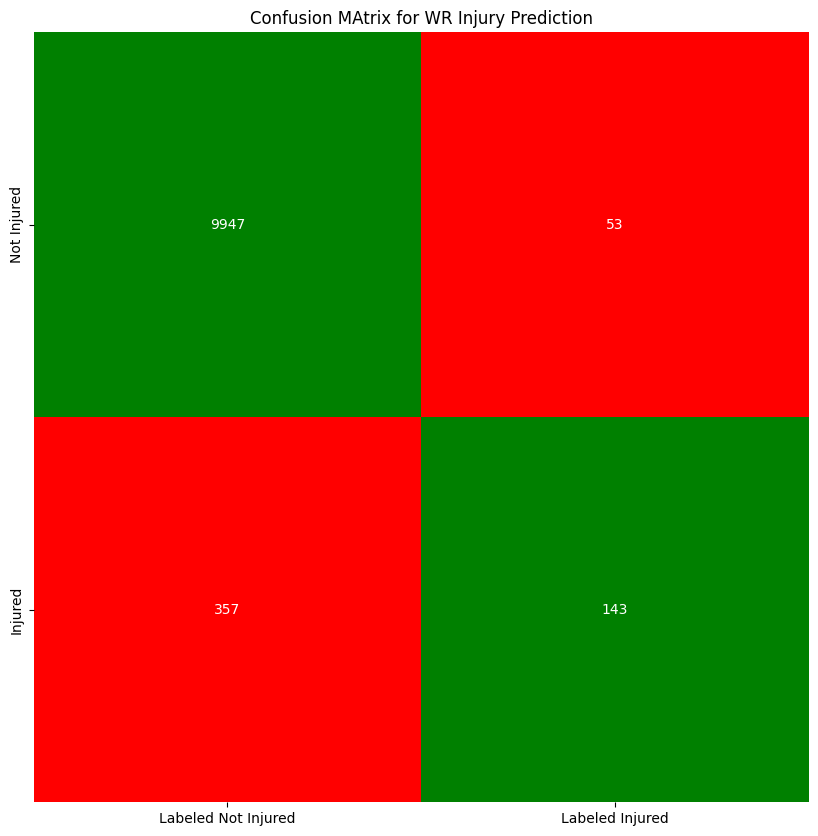

In [8]:
cmap = ListedColormap(['green', 'red', 'red', 'green'])
colors = [[1, 2], [3, 4]]
plt.figure(figsize=(10,10))
sns.heatmap(colors, annot=conf_matrix, fmt='d', cmap=cmap, cbar=False)
plt.title("Confusion MAtrix for WR Injury Prediction")
plt.yticks([.5, 1.5],labels=['Not Injured', 'Injured'])
plt.xticks([.5, 1.5],labels=['Labeled Not Injured', 'Labeled Injured'])

plt.show()